In [10]:
import sys
sys.path.append('../src')

import importlib
import nn.optimizers
importlib.reload(nn.optimizers)
import nn.model
importlib.reload(nn.model)
import nn.layers
importlib.reload(nn.layers)
import nn.activations
importlib.reload(nn.activations)
import nn.losses
importlib.reload(nn.losses)


<module 'nn.losses' from 'c:\\Users\\enasa\\Documents\\projects\\mini-neural-net-framework\\notebooks\\../src\\nn\\losses.py'>

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Import your framework modules
from nn import Dense, ReLU, Softmax
from nn.losses import SoftmaxCrossEntropy
from nn.optimizers import SGD
from nn.model import Model


In [13]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

digits = load_digits()
X = digits.data  # shape (1797, 64)
y = digits.target.reshape(-1, 1)

# Normalize
X = X / 16.0

# One-hot encode labels
enc = OneHotEncoder(sparse_output=False)
y_onehot = enc.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_onehot, test_size=0.2, random_state=42
)

X_train.shape, y_train.shape


((1437, 64), (1437, 10))

Build The Model

In [14]:
model = Model([
    Dense(64, 32),
    ReLU(),
    Dense(32, 10)   # no softmax here!
])

model.compile(
    loss=SoftmaxCrossEntropy(),
    optimizer=SGD(lr=0.05, momentum=0.9)
)



Train the Model

In [15]:
losses = model.fit(
    X_train,
    y_train,
    epochs=40,
    batch_size=32,
    verbose=True
)


Epoch 1/40 — Loss: 5.1098
Epoch 2/40 — Loss: 2.7278
Epoch 3/40 — Loss: 2.4363
Epoch 4/40 — Loss: 2.3364
Epoch 5/40 — Loss: 2.2947
Epoch 6/40 — Loss: 2.2727
Epoch 7/40 — Loss: 2.2558
Epoch 8/40 — Loss: 2.2397
Epoch 9/40 — Loss: 2.2203
Epoch 10/40 — Loss: 2.1976
Epoch 11/40 — Loss: 2.1712
Epoch 12/40 — Loss: 2.1396
Epoch 13/40 — Loss: 2.0999
Epoch 14/40 — Loss: 2.0556
Epoch 15/40 — Loss: 2.0050
Epoch 16/40 — Loss: 1.9483
Epoch 17/40 — Loss: 1.8865
Epoch 18/40 — Loss: 1.8257
Epoch 19/40 — Loss: 1.7598
Epoch 20/40 — Loss: 1.6950
Epoch 21/40 — Loss: 1.6287
Epoch 22/40 — Loss: 1.5719
Epoch 23/40 — Loss: 1.5105
Epoch 24/40 — Loss: 1.4541
Epoch 25/40 — Loss: 1.4042
Epoch 26/40 — Loss: 1.3548
Epoch 27/40 — Loss: 1.3071
Epoch 28/40 — Loss: 1.2682
Epoch 29/40 — Loss: 1.2274
Epoch 30/40 — Loss: 1.1909
Epoch 31/40 — Loss: 1.1575
Epoch 32/40 — Loss: 1.1255
Epoch 33/40 — Loss: 1.0927
Epoch 34/40 — Loss: 1.0681
Epoch 35/40 — Loss: 1.0414
Epoch 36/40 — Loss: 1.0135
Epoch 37/40 — Loss: 0.9883
Epoch 38/4

Plot Loss Curve

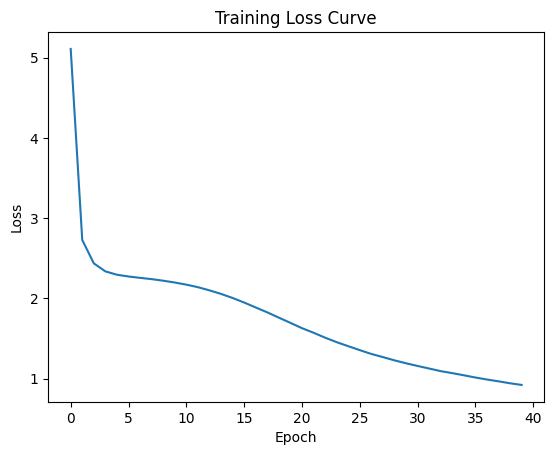

In [16]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()


Evaluate Accuracy

In [17]:
y_pred = model.predict(X_test)
pred_labels = np.argmax(y_pred, axis=1)
true_labels = np.argmax(y_test, axis=1)

accuracy = np.mean(pred_labels == true_labels)
accuracy


np.float64(0.8611111111111112)